# detM-v1

- prepares histogram of the determinants of a massive overlap Dirac operator

- **disadvantage of the v1:** computes determinant for only one quark mass - necessary to read all eigenvalues again for another quark mass

In [1]:
import matplotlib.pyplot as plt
import numpy as np

###### How to read complex eigenvalues for one configuration

In [2]:
evs = np.loadtxt("/mnt/e/Jaime/b4_20x20Ov/Eig/L020x020_b04000i00001-HO.eig")

In [3]:
len(evs)

800

In [4]:
evs.dtype

dtype('float64')

In [5]:
evs[0]

array([ 0.00213645, -0.06533247])

In [6]:
evs[0][0] + evs[0][1] * 1j

(0.00213644822675577-0.0653324731085987j)

In [7]:
cevs = np.array([np.complex128(ev[0] + ev[1] * 1j) for ev in evs])

In [8]:
cevs[0]

(0.00213644822675577-0.0653324731085987j)

- all put together in function `readCEVs()`

In [9]:
def readCEVs(eigFile):
    evs = np.loadtxt(eigFile)
    return np.array([np.complex128(ev[0] + ev[1] * 1j) for ev in evs])

In [10]:
cevs = readCEVs("/mnt/e/Jaime/b4_20x20Ov/Eig/L020x020_b04000i00001-HO.eig")

In [11]:
cevs[0]

(0.00213644822675577-0.0653324731085987j)

###### Determinant of the massive overlap operator

In [12]:
def detm(cevs, qm, nmz, out):
# cevs - complex eigenvalues
# qm - quark mass
# nmz - numerical normalization (about 0.63 is optimal)
# out - print complex p if True
    f = 1.0 - qm / 2.0
    p = np.complex128(1 + 0j)
    for i in range(len(cevs)):
        p *= (f * cevs[i] + qm) * nmz
    if out: print(p)
    return p.real

In [13]:
detm(cevs, 0.05, 0.63, True)

(2.6583807559420576-1.992850329202156e-14j)


2.6583807559420576

###### Normalized determinants of an ensemble (max = 1)

In [14]:
def detEnMax1(eigFilesList, qm):
# determinants normalized to max is equal to one
# eigFilesList - list of files with eigenvalues
# qm - quark mass
    f = open(eigFilesList, "r")
    dets = []
    for eigFileName in f:
        dets.append(detm(readCEVs(eigFileName.strip()), qm, 0.63, False))
    f.close()
    dmax = max(dets)
    return [d / dmax for d in dets]

In [15]:
%%time
dets = detEnMax1("/mnt/e/Jaime/b4_20x20Ov/eigFiles.list", 0.05)

CPU times: user 51.5 s, sys: 5.12 s, total: 56.6 s
Wall time: 1min 50s


In [16]:
dets[:10]

[0.01520670613357288,
 0.019749360256504034,
 0.009750188723213512,
 0.024755490133428804,
 0.008313437300582396,
 0.001942756592798554,
 0.005893719774442306,
 0.018367616653706186,
 0.00022440915512308182,
 0.06696043871009695]

(array([1.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 4.000e+00,
        1.400e+01, 1.300e+01, 3.700e+01, 3.200e+01, 5.900e+01, 1.170e+02,
        1.850e+02, 3.310e+02, 4.800e+02, 6.100e+02, 8.960e+02, 1.154e+03,
        1.392e+03, 1.426e+03, 1.304e+03, 9.060e+02, 6.070e+02, 2.990e+02,
        9.800e+01, 2.600e+01]),
 array([3.98107171e-06, 6.30957344e-06, 1.00000000e-05, 1.58489319e-05,
        2.51188643e-05, 3.98107171e-05, 6.30957344e-05, 1.00000000e-04,
        1.58489319e-04, 2.51188643e-04, 3.98107171e-04, 6.30957344e-04,
        1.00000000e-03, 1.58489319e-03, 2.51188643e-03, 3.98107171e-03,
        6.30957344e-03, 1.00000000e-02, 1.58489319e-02, 2.51188643e-02,
        3.98107171e-02, 6.30957344e-02, 1.00000000e-01, 1.58489319e-01,
        2.51188643e-01, 3.98107171e-01, 6.30957344e-01]),
 <BarContainer object of 26 artists>)

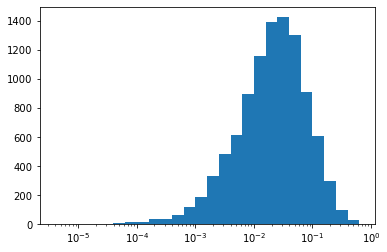

In [17]:
plt.xscale('log')
plt.hist(dets, bins = [10.0**r for r in np.arange(-5.4, 0, 0.2)])

###### Topology

In [18]:
def countZeros(cevs):
    return len([cev for cev in cevs if abs(cev) < 1e-12 ])

In [19]:
countZeros(cevs)

1

In [20]:
def QdetEnMax1(eigFilesList, qm):
# determinants normalized to max is equal to one with top. charge
# eigFilesList - list of files with eigenvalues
# qm - quark mass

    f = open(eigFilesList, "r")
    confs = []
    for eigFileName in f:
        cevs = readCEVs(eigFileName.strip())
        confs.append([countZeros(cevs), detm(cevs, qm, 0.63, False)])
    f.close()

    # normalize the determinant to max is equal to one
    [Qs, dets] = np.array(confs).transpose()
    dmax = max(dets)
    for i in range(len(confs)): confs[i][1] /= dmax

    return confs

In [21]:
%%time
confs = QdetEnMax1("/mnt/e/Jaime/b4_20x20Ov/eigFiles.list", 0.05)

CPU times: user 52.5 s, sys: 4.89 s, total: 57.4 s
Wall time: 1min 50s


In [22]:
confs[0]

[1, 0.01520670613357288]

In [23]:
[Qs, dets] = np.array(confs).transpose()

In [24]:
Qs[:10]

array([1., 2., 2., 1., 2., 4., 3., 1., 4., 1.])

In [25]:
dets[:10]

array([0.01520671, 0.01974936, 0.00975019, 0.02475549, 0.00831344,
       0.00194276, 0.00589372, 0.01836762, 0.00022441, 0.06696044])

In [26]:
Qmax = int(max(Qs))
Qmax

7

In [27]:
# create Qmax + 1 empty lists
Qdet = []
for i in range(Qmax + 1): Qdet.append([])
# add determinants according to topological charge
for i in range(len(confs)):
    Qdet[confs[i][0]].append(confs[i][1])
# how many entries are in each topological sector
[len(Qdet[i]) for i in range(Qmax + 1)]

[2307, 3844, 2365, 1050, 335, 78, 17, 4]

(array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 7.000e+00,
         8.000e+00, 2.700e+01, 4.600e+01, 6.500e+01, 1.240e+02, 1.820e+02,
         2.910e+02, 3.360e+02, 3.760e+02, 3.260e+02, 2.560e+02, 1.590e+02,
         7.200e+01, 2.600e+01],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 3.000e+00, 2.000e+00, 4.000e+00, 1.500e+01,
         3.600e+01, 8.600e+01, 1.260e+02, 2.020e+02, 3.560e+02, 5.660e+02,
         8.360e+02, 1.018e+03, 1.047e+03, 8.320e+02, 5.960e+02, 2.990e+02,
         9.800e+01, 2.600e+01],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
         0.000e+00, 1.000e+00, 5.000e+00, 6.000e+00, 1.300e+01, 2.900e+01,
         6.800e+01, 1.540e+02, 2.500e+02, 3.800e+02, 6.610e+02, 9.900e+02,
         1.304e+03, 1.416e+03, 1.299e+03, 9.060e+02, 6.070e+02, 2.990e+02,
         9.800e+01, 2.600e+01],
    

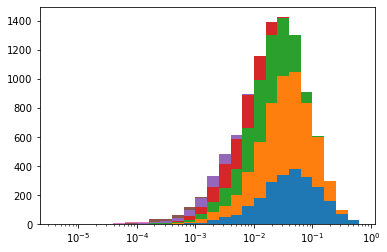

In [28]:
plt.xscale('log')
plt.hist([Qdet[i] for i in range(len(Qdet))], stacked = True, bins = [10.0**r for r in np.arange(-5.4, 0, 0.2)])

(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,
           7.,   8.,  27.,  46.,  65., 124., 182., 291., 336., 376., 326.,
         256., 159.,  72.,  26.],
        [  0.,   0.,   0.,   0.,   0.,   1.,   2.,   3.,   6.,  14.,  20.,
          46.,  67.,  76.,  67.,  28.,   5.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.]]),
 array([3.98107171e-06, 6.30957344e-06, 1.00000000e-05, 1.58489319e-05,
        2.51188643e-05, 3.98107171e-05, 6.30957344e-05, 1.00000000e-04,
        1.58489319e-04, 2.51188643e-04, 3.98107171e-04, 6.30957344e-04,
        1.00000000e-03, 1.58489319e-03, 2.51188643e-03, 3.98107171e-03,
        6.30957344e-03, 1.00000000e-02, 1.58489319e-02, 2.51188643e-02,
        3.98107171e-02, 6.30957344e-02, 1.00000000e-01, 1.58489319e-01,
        2.51188643e-01, 3.98107171e-01, 6.30957344e-01]),
 <a list of 2 BarContainer objects>)

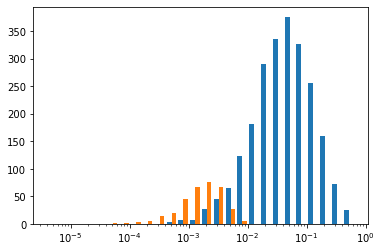

In [29]:
plt.xscale('log')
plt.hist([Qdet[0], Qdet[4]], stacked = False, bins = [10.0**r for r in np.arange(-5.4, 0, 0.2)])

*Hip, 2023-08-04*